### Example 1 (簡單線性回歸)
簡單線性回歸舉例， $$ y=ax+b $$ ，a稱為斜率 ， b稱為截距

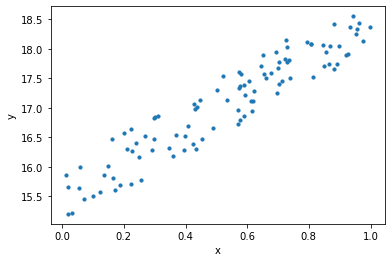

In [2]:
#import 
import numpy as np
import matplotlib.pyplot as plt

#產生亂數資料
np.random.seed(0)
noise = np.random.rand(100,1)  #0~1之間 隨機取100個
x = np.random.rand(100,1)
y = 3 * x + 15 +noise          # y=ax+b Target function a=3,b=15 


#plot
plt.scatter(x,y,s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Linear Regression
線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料。

Parameters:
1. fit_intercept : 是否有截距，如果沒有則直線過原點

Attributes:
1. coef_ : 取得斜率
2. intercept_ : 取得截距

Methods:
1. fit : 放入X 、y 進行模型擬合
2. predict : 預測並回傳預測類別
3. score : R2 score 模型評估

In [3]:
from sklearn.linear_model import LinearRegression

#建立LinearRegression 模型
linearMmodel = LinearRegression(fit_intercept=True)
#使用訓練資料訓練模型
linearMmodel.fit(x,y)
#使用訓練資料預測
predicted = linearMmodel.predict(x)

### 模型評估
scikit-learn 決策樹迴歸模型的score函式是 R2 score, 可做為模型評估依據，其數值越接近於1代表模型越佳。除了R2 score還有其他許多回歸模型的評估方法，例如: MSE、MAE、RMSE

In [4]:
from sklearn import metrics
print("R2 score: " , linearMmodel.score(x,y))

mse = metrics.mean_absolute_error(y,predicted)
print("MSE score: ",mse)

R2 score:  0.888257994980688
MSE score:  0.24957075161596495


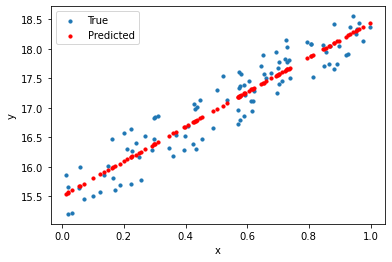

In [5]:
plt.scatter(x,y,s=10,label="True")
plt.scatter(x,predicted,color="r",s=10,label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
#模型的斜率及截距，分別儲存在linearMmodel.coef_[0] 和 linearMmodel.intercept_中
coef = linearMmodel.coef_
intercept = linearMmodel.intercept_

print("斜率a = ",coef[0][0])
print("截距b = ",intercept[0])

斜率a =  2.9311233545408943
截距b =  15.509166339414461


### Example 2 (多線性回歸)
多維回歸的線性模型，$$ y=a0+a1x1+a2x2+a3x3+a4x4.... $$
可以在y上建立多維的陣列

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)  #三個X 一樣取100個點
y = 0.5 + np.dot( X , [ 1.5 , -1. , 2. ] )

In [9]:
linearMmodel.fit(X,y)
pred = linearMmodel.predict(X)

In [10]:
print(linearMmodel.intercept_)
print(linearMmodel.coef_)

0.5000000000000053
[ 1.5 -1.   2. ]


### Example3 (非線性回歸)
上面的例子資料都很均勻分布在一條直線上，但現實的資料可能並只會發生在一條線上。
下面示範一個多項次回歸模型例子

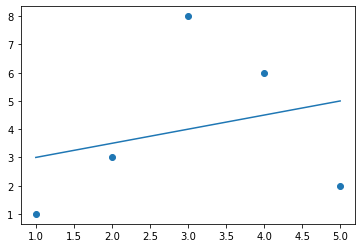

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,8,6,2])
#原本shape為(5,),調整為(5,1)
x = x[:,np.newaxis]
#default 為一元一次方程式
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x,yfit)

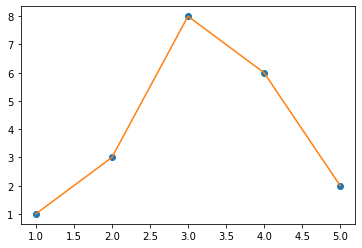

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#make_pipeline是指可以將多個scikit learn的function一起執行

def PolynomialRegression(degree=2 , **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

ypred = PolynomialRegression(degree=4).fit(x,y).predict(x)
plt.plot(x,y,"o")
plt.plot(x,ypred)

In [37]:
def make_data(N,err=1,rseed=42):
    rng = np.random.RandomState(rseed)
    x=rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y

make_data(20)

(array([[1.40280301e-01],
        [9.03857692e-01],
        [5.35815131e-01],
        [3.58391981e-01],
        [2.43418162e-02],
        [2.43342904e-02],
        [3.37370600e-03],
        [7.50261116e-01],
        [3.61339257e-01],
        [5.01366775e-01],
        [4.23721405e-04],
        [9.40725121e-01],
        [6.92960750e-01],
        [4.50878979e-02],
        [3.30603187e-02],
        [3.36372142e-02],
        [9.25633424e-02],
        [2.75369313e-01],
        [1.86576499e-01],
        [8.48144121e-02]]),
 array([ 4.82536287,  9.3180902 ,  7.51919171,  6.40615726,  3.42330203,
         1.73139017,  0.39388837,  7.39914252,  7.28801505,  8.44804389,
        -1.10880022,  9.41482951,  8.13826484,  2.81593263,  1.8829048 ,
         4.36933262,  4.79340638,  6.27824604,  7.33307525,  3.36832292]))

In [30]:
x = np.array([[1.40280301e-01],
        [9.03857692e-01],
        [5.35815131e-01],
        [3.58391981e-01],
        [2.43418162e-02],
        [2.43342904e-02],
        [3.37370600e-03],
        [7.50261116e-01],
        [3.61339257e-01],
        [5.01366775e-01],
        [4.23721405e-04],
        [9.40725121e-01],
        [6.92960750e-01],
        [4.50878979e-02],
        [3.30603187e-02],
        [3.36372142e-02],
        [9.25633424e-02],
        [2.75369313e-01],
        [1.86576499e-01],
        [8.48144121e-02]])

y = np.array([[1.40280301e-01],
        [9.03857692e-01],
        [5.35815131e-01],
        [3.58391981e-01],
        [2.43418162e-02],
        [2.43342904e-02],
        [3.37370600e-03],
        [7.50261116e-01],
        [3.61339257e-01],
        [5.01366775e-01],
        [4.23721405e-04],
        [9.40725121e-01],
        [6.92960750e-01],
        [4.50878979e-02],
        [3.30603187e-02],
        [3.36372142e-02],
        [9.25633424e-02],
        [2.75369313e-01],
        [1.86576499e-01],
        [8.48144121e-02]])

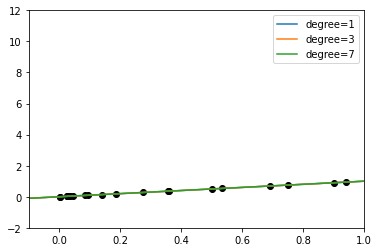

In [33]:
#測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(x.ravel(),y,color="black")
#測試1,3,7的degree
for degree in [1,3,7]:
    y_tset = PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(),y_tset,label="degree={}".format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc="best")